In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# state
N = 500 # particles
# Argon
sigma = 3.405 # A
eps = 1.0 # kJ/mol

def state(N, sigma, eps, rc, T_red, rho_red, p_red):
    kB = 0.0083145
    Na = 6.022
    r = rc * sigma
    T = T_red * eps / kB
    V = N / rho_red * (sigma)**3
    p = p_red * eps / (sigma)**3 / Na * 1e5
    print("rc = {} A".format(r))
    print("T  = {} K".format(T))
    print("V  = {} A^3".format(V))
    print("p  = {} bar".format(p))
    return r, T, V, p
    
r, T, V, p = state(N, sigma, eps, 3, 0.9, 0.9, 2.5848)
print("L  = {} A".format(V**(1./3.)))

rc = 10.215 A
T  = 108.24463287 K
V  = 21932.030625 A^3
p  = 1087.26359088 bar
L  = 27.9915070437 A


In [6]:
ener_ca = "nvt_tail_ener_cache.dat"
ener_nc = "nvt_tail_ener_nocache.dat"

prop_cass = "nvt.argon.tail.prp"

# systems' tail correction for N = 500 
e_t = -1.3943553866457978e2

# energy
e_ca = np.genfromtxt(ener_ca, usecols=1)
e_nc = np.genfromtxt(ener_nc, usecols=1)
e_c = np.genfromtxt(prop_cass, usecols=3) /(120. * 0.0083145)

# subtract tail correction from nist data
e_nist = -6.1773 - e_t/500

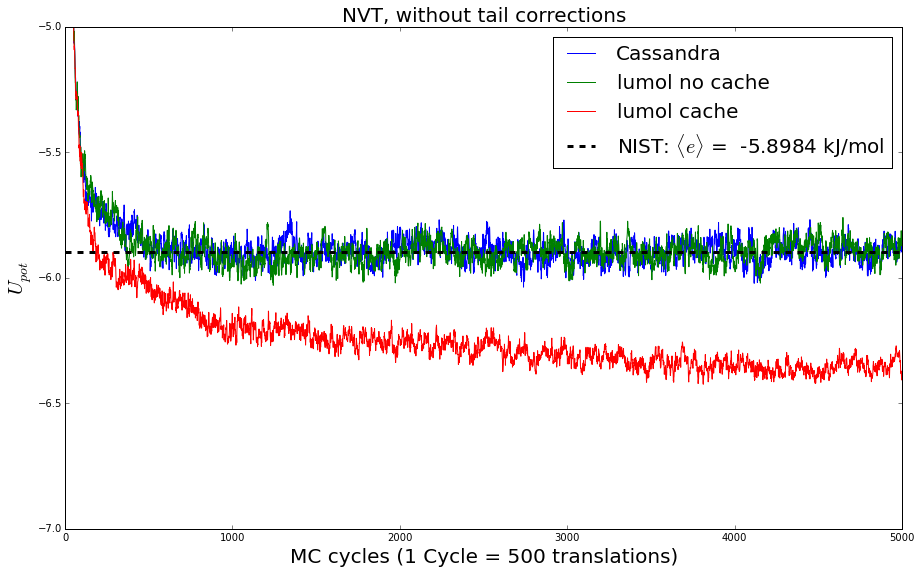

In [8]:
fs = 20
plt.figure(figsize=[15, 9])
plt.title("NVT, without tail corrections", fontsize=fs)
plt.plot(e_c/500, label=r'Cassandra')
plt.plot(e_nc/500, label='lumol no cache')
plt.plot(e_ca/500, label='lumol cache')
plt.plot([0, len(e_c)], [e_nist, e_nist], 'k--', linewidth=3, 
         label=r'NIST: $\langle e \rangle$ = {:8.5} kJ/mol'.format(e_nist))
plt.xlabel("MC cycles (1 Cycle = 500 translations)", fontsize=fs)
plt.ylabel(r"$U_{pot}$", fontsize=fs)
plt.ylim(-7, -5)
#plt.xlim(0,500)
plt.legend(loc='best', fontsize=fs)
plt.show()

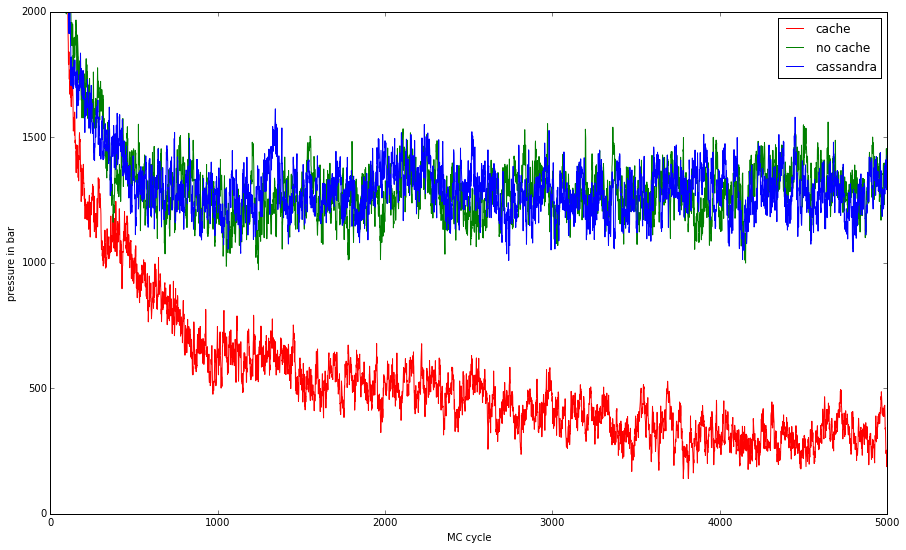

In [25]:
# nist pressure in bar
nist_p = 2.5848
nist_p_bar = nist_p * 1.0 / (3.405)**3 / 6.022 * 1e5

p_cache = np.genfromtxt("nvt_tail_prp_cache.dat", usecols=3)
p_ncache = np.genfromtxt("nvt_tail_prp_nocache.dat", usecols=3)
p_c = np.genfromtxt("nvt.argon.tail.prp", usecols=2)

plt.figure(figsize=[15, 9])
#plt.plot([0, 500], [nist_p_bar, nist_p_bar], 'k--', linewidth=3, label=r'$\langle p_n \rangle$ = {:8.5} bar'.format(nist_p_bar))
plt.plot(p_cache, 'r', label='cache')
plt.plot(p_ncache, 'g', label='no cache')
plt.plot(p_c, 'b', label='cassandra')
plt.legend()
plt.ylim(0,2000)
plt.xlabel("MC cycle")
plt.ylabel("pressure in bar")
plt.show()